In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time


In [50]:
def read_files():
    a1_data = np.fromfile('a1_data.iq', np.complex64)  # complex64, from Antenna 1
    print(a1_data)
    a2_data = np.fromfile('a2_data.iq', np.complex64)  #complex64 from Antenna 2
    print(a2_data)
    return a1_data , a2_data ;


In [51]:
def plot_data(a1_data, a2_data):
    
    f, axs = plt.subplots(2,2,figsize=(15,15))
    
    #### To frequency domain ####
    Fs = 2e6  # define sampling rate
    # Let's try a frequency translation. For a complex signal,
    # frequency translation is achieved with multiplication by a complex exponential
    # To mix the data down, generate a complex exponential
    # with phase -f_shift/Fs
    fc = np.exp(-1.0j * 2.0 * np.pi * 50000 / Fs * np.arange(len(a1_data)))
    # Try plotting this complex exponential with a scatter plot of the complex plan -
    # what do you expect it to look like?
    y = a1_data * fc
    
    
    
    # Plot constellation to make sure it looks right
    axs[0,0].plot(np.real(a1_data), np.imag(a1_data), '.')
    axs[0,0].grid(True)
    axs[0,0].set_title('I vs Q Constellation')

    axs[0,1].psd(a1_data, NFFT=1024, Fs=1000000, color="blue")  # original
    axs[0,1].psd(y, NFFT=1024, Fs=1000000, color="green")  # translated
    axs[0,1].set_title('PSD of signal loaded from file')

    axs[1,0].angle_spectrum(a1_data, Fs/500e3)
    #f = np.linspace(Fs/-2, Fs/2, Fs)
    #axs[1,0].plot(np.fft.fftshift(a1_data), f )
    axs[1,0].set_title('FFT Shift of Data')

    axs[1,1].magnitude_spectrum(a1_data, Fs)
    axs[1,1].set_title('Magnitude')

    
    
    
    f, axs = plt.subplots(2,2,figsize=(15,15))
    
    #### To frequency domain ####
    Fs = 2e6  # define sampling rate
    # Let's try a frequency translation. For a complex signal,
    # frequency translation is achieved with multiplication by a complex exponential
    # To mix the data down, generate a complex exponential
    # with phase -f_shift/Fs
    fc = np.exp(-1.0j * 2.0 * np.pi * 50000 / Fs * np.arange(len(a2_data)))
    # Try plotting this complex exponential with a scatter plot of the complex plan -
    # what do you expect it to look like?
    y = a2_data * fc
    
    
    
    # Plot constellation to make sure it looks right
    axs[0,0].plot(np.real(a2_data), np.imag(a2_data), '.')
    axs[0,0].grid(True)
    axs[0,0].set_title('I vs Q Constellation')

    axs[0,1].psd(a2_data, NFFT=1024, Fs=1000000, color="blue")  # original
    axs[0,1].psd(y, NFFT=1024, Fs=1000000, color="green")  # translated
    axs[0,1].set_title('PSD of signal loaded from file')

    axs[1,0].angle_spectrum(a2_data, Fs/500e3)
    #f = np.linspace(Fs/-2, Fs/2, Fs)
    #axs[1,0].plot(np.fft.fftshift(a1_data), f )
    axs[1,0].set_title('FFT Shift of Data')

    axs[1,1].magnitude_spectrum(a2_data, Fs)
    axs[1,1].set_title('Magnitude')
    

In [52]:
# def update_plots()


# New Calc Block
y = 3.368455
pi = np.pi
d = 0.976 #97.6cm

loop = True
while (loop == True):
    a1_data, a2_data = read_files();

    if (len(a1_data) != len(a2_data)):
        print("Unable to calculate phase, next iteration \n")
        print("Len a1_data: ", len(a1_data) , " and len a2_data: ", len(a2_data))
        time.sleep(1)
        loop = False
        continue

    z = a1_data * np.conj(a2_data)

    phase = np.average(z.imag)

    print("Average phase: ", phase, "\n")

    AoA_rad = np.arcsin((y * phase) / (2 * pi * d))
    AoA_deg = AoA_rad * 180/pi 

    print("AoA = ", AoA_deg, "\n")
    time.sleep(1)
    loop = False


# Start #
print("Starting Direction finding Application")

# Loop here #

# Get sample data to file from SDR #
# .py file to read data from SDR to file(s)

y = 3.368455 # Wave length and 89MHz
pi = np.pi
d = 0.976 #97.6cm

# Read file data #
a1_data, a2_data = read_files()
print("Len a1: " ,len(a1_data))


# Calculations on data #
avg_phase_1 = 0

for i in range(len(a1_data)):
      avg_phase_1+=(a1_data[i].imag)
print("Average phase for a1 :", avg_phase_1/len(a1_data))        
    
    
print("Len a2: ", len(a2_data))
avg_phase_2 = 0

for i in range(len(a2_data)):
      avg_phase_2+=(a2_data[i].imag)
print("Average phase for a2 :", avg_phase_2/len(a2_data))


phase_diff = avg_phase_2 - avg_phase_1

print("Phase difference = ", phase_diff)

x = (y * phase_diff) / ( 2* pi *d)

print(x)

AoA_rad = np.arcsin(x)
AoA_deg = AoA_rad * 180/pi 

print("AoA = ", AoA_deg, "\n")

# loop ends here #

In [53]:
#plot_data(a1_data, a2_data)
a1_data, a2_data = read_files()

[-0.00244148-0.0004883j   0.        -0.00244148j  0.00195318+0.j
 ...  0.00097659-0.00244148j  0.00146489+0.00097659j
 -0.00097659+0.00195318j]
[-0.00341807+0.0004883j  -0.00097659-0.00292978j  0.00341807-0.0004883j
 ...  0.0004883 -0.00244148j  0.00244148+0.00097659j
 -0.0004883 +0.00292978j]


# Whole Data time domain a1 a2 real portions

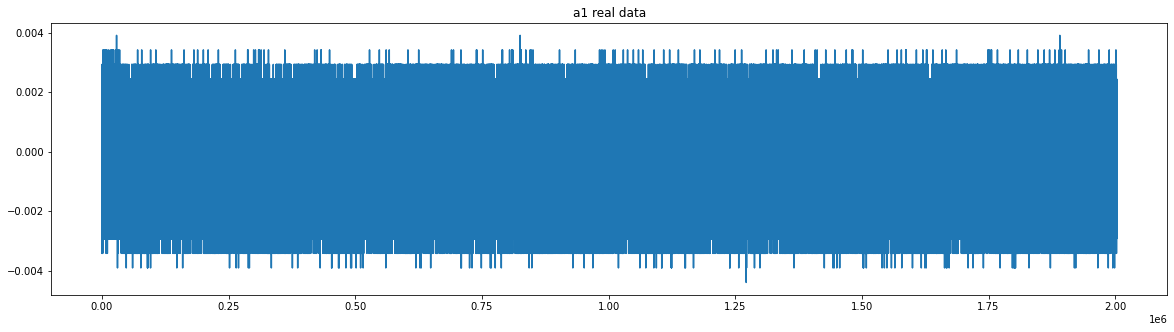

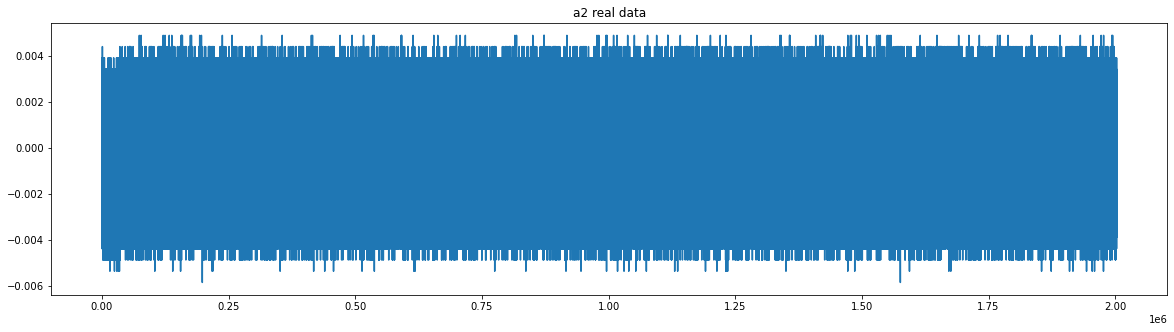

In [54]:
plt.figure(figsize=(20,5));
plt.plot(a1_data.real);
plt.title("a1 real data");
plt.figure(figsize=(20,5));
plt.plot(a2_data.real);
plt.title("a2 real data");



# View Starting portion weird value


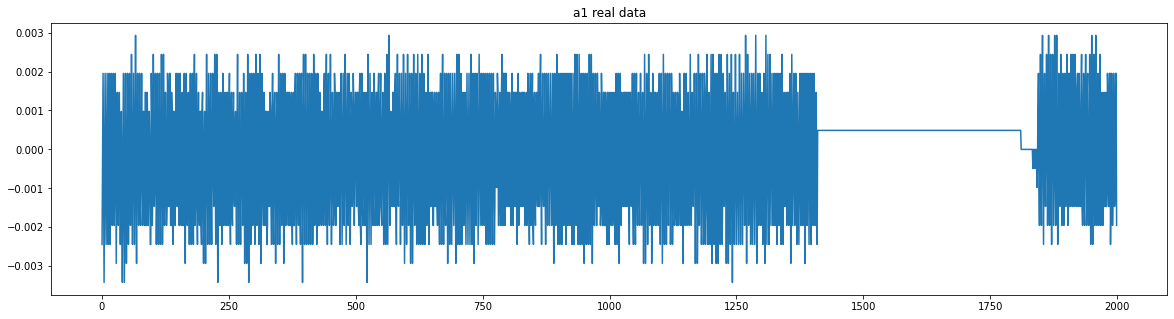

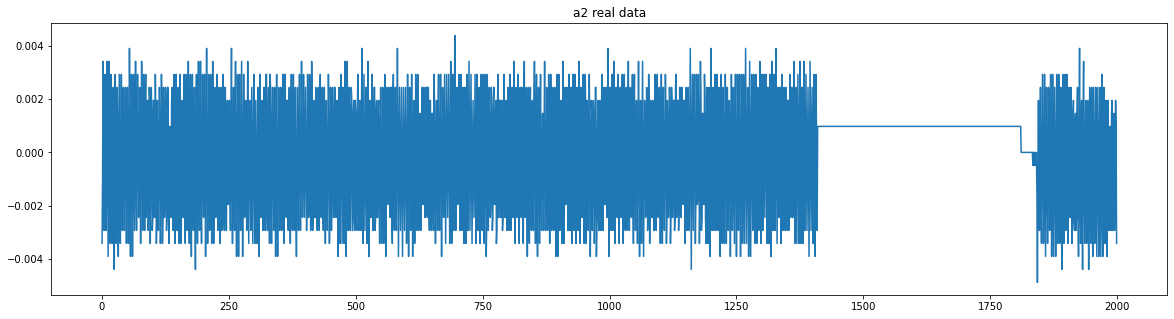

In [55]:
plt.figure(figsize=(20,5));
plt.plot(a1_data.real[0:2000]);
plt.title("a1 real data");
plt.figure(figsize=(20,5));
plt.plot(a2_data.real[0:2000]);
plt.title("a2 real data");


# ignore starting portion with strange value

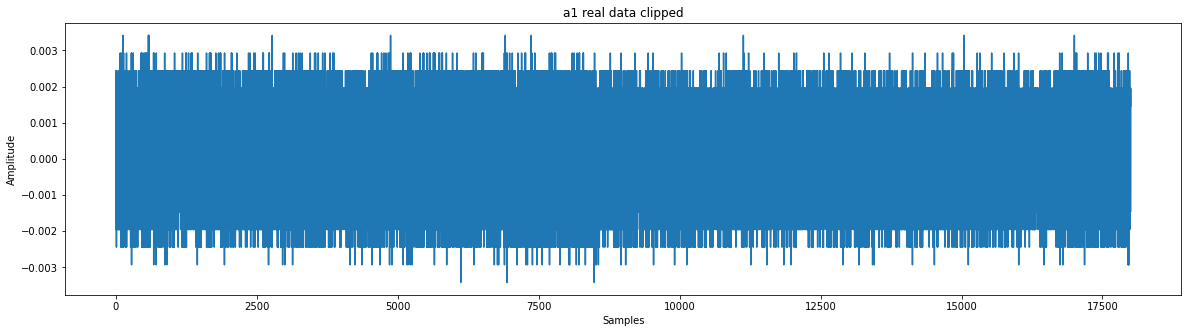

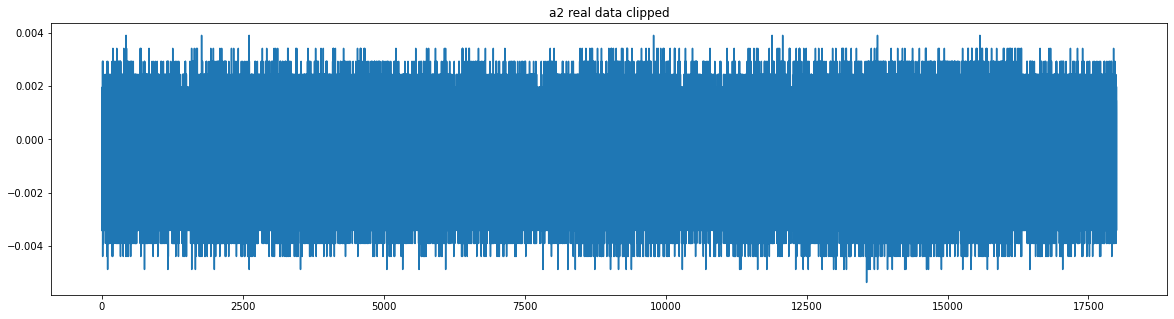

In [56]:
startindex = 2000
endindex = 20000

a1_clipped = a1_data[startindex:endindex]
a2_clipped = a2_data[startindex:endindex]

#mean1 = np.mean(a1_clipped)
#mean2 = np.mean(a2_clipped)

a1_dc = a1_clipped #- mean1
a2_dc = a2_clipped #- mean2 

plt.figure(figsize=(20,5));
plt.plot(a1_clipped.real);
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("a1 real data clipped");
plt.figure(figsize=(20,5));
plt.plot(a2_clipped.real);
plt.title("a2 real data clipped");



# A1 A2 shiffted FFT

In [57]:
sample_rate = 2e6
N = len(a1_clipped.real)
deltaf = sample_rate / N

x = np.arange(N)
faxis = (x*deltaf ) + 149e6
faxis = faxis / 1e6

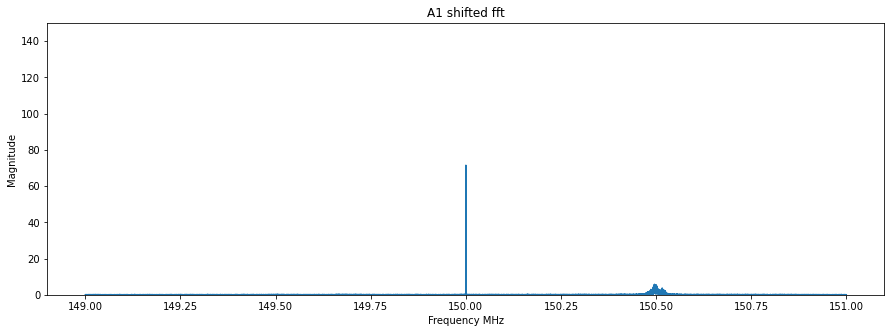

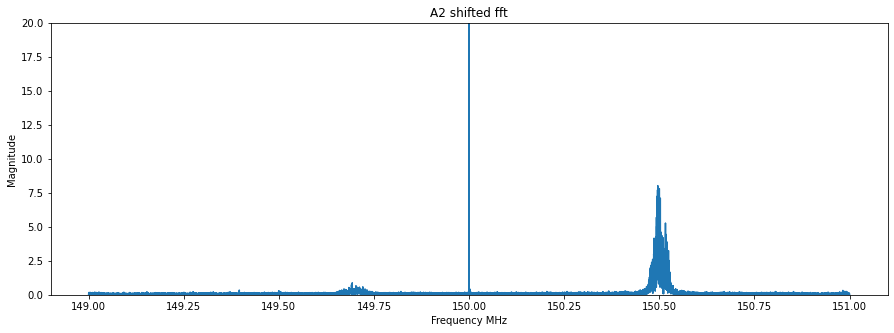

In [58]:
A1 = np.fft.fft(a1_dc)
A1_shift = np.fft.fftshift(A1)


plt.figure(figsize=(15,5));
plt.plot(faxis,abs(A1_shift));
plt.title("A1 shifted fft");
plt.xlabel("Frequency MHz")
plt.ylabel("Magnitude")
plt.ylim(0,150);

A2 = np.fft.fft(a2_dc)
A2_shift = np.fft.fftshift(A2)

plt.figure(figsize=(15,5));
plt.plot(faxis,abs(A2_shift));
plt.title("A2 shifted fft");
plt.xlabel("Frequency MHz")
plt.ylabel("Magnitude")
plt.ylim(0,20);


# Zoom in on Signal

13523
13523


/Users/keags/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/keags/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


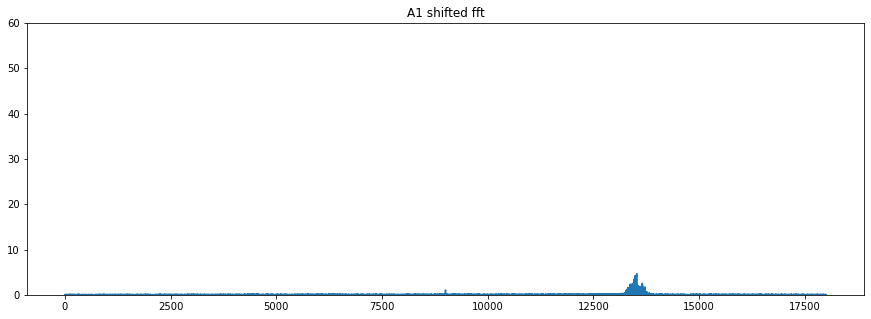

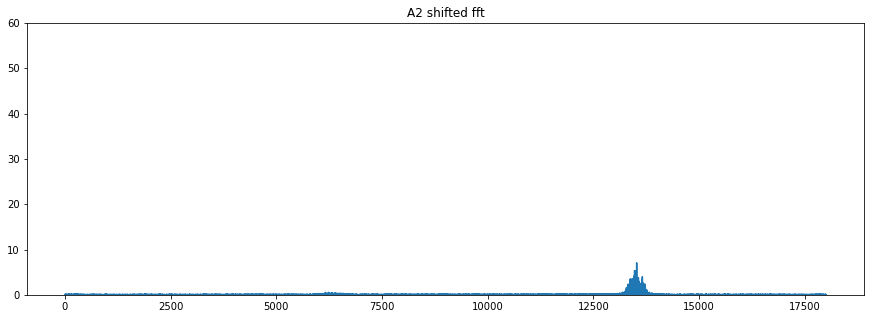

In [68]:
plt.figure(figsize=(15,5));
plt.plot(A1_shift[:]);
plt.title("A1 shifted fft");
plt.ylim(0,60);


maxsignal_1 = np.argmax(A1_shift)
print(maxsignal_1)


plt.figure(figsize=(15,5));
plt.plot(A2_shift[:]);
plt.title("A2 shifted fft");
plt.ylim(0,60);


maxsignal_2 = np.argmax(A2_shift)
print(maxsignal_2)

# Implement filter fourier domain

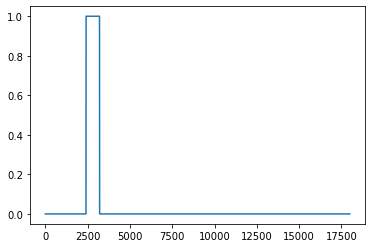

In [69]:
H = np.zeros(len(a1_clipped))
for i in range (2400,3200,1):
    H[i] = 1

plt.plot(H);

# Time domain of filtered signals

/Users/keags/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/keags/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


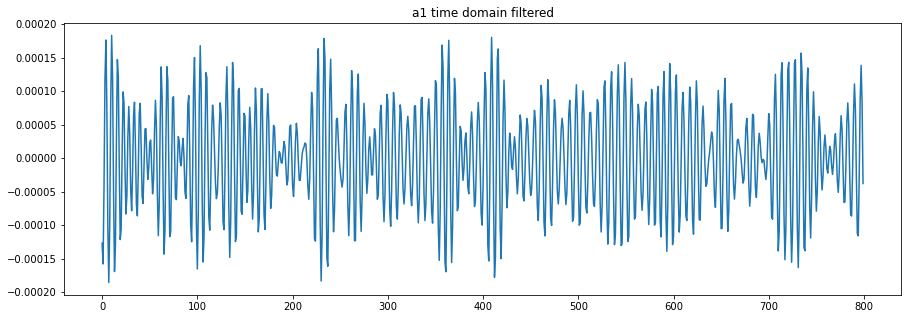

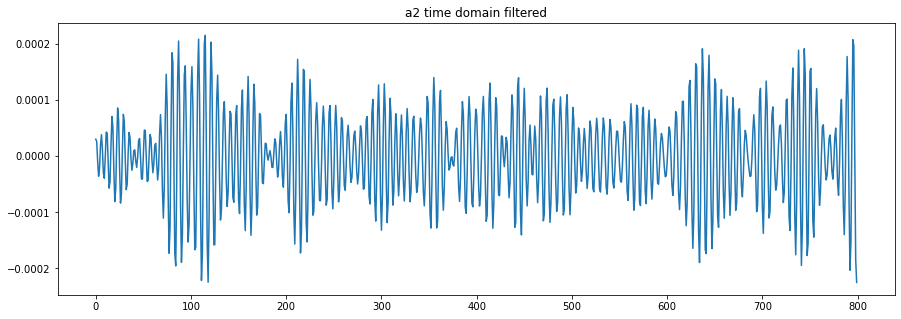

In [70]:
filtered_A1 = A1_shift * H ;
filtered_A2 = A2_shift * H ;


plt.figure(figsize=(15,5));
time_a1 = np.fft.ifft(filtered_A1);
plt.plot(time_a1[2400:3200]);
plt.title("a1 time domain filtered");


plt.figure(figsize=(15,5));
time_a2 = np.fft.ifft(filtered_A2);
plt.plot(time_a2[2400:3200]);
plt.title("a2 time domain filtered");

Z = A1_shift * conj(A2_shift)

plot(abs(Z))
plot(angle(Z))

pk1 = 573

Z1 = Z[pk1]

print(Z1)

line(  (0,0) to (real(Z1), imag(Z1)))

# Calculate Phase

(4.712500880105822+0.4004555411098315j)
(7.057532249045064-0.9027615077348626j)
0.21199735527207686


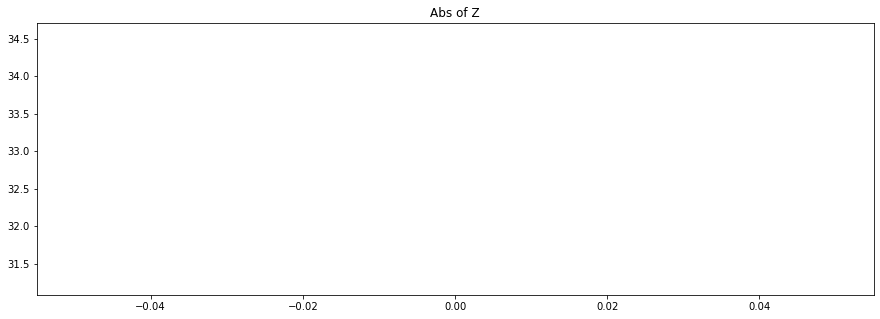

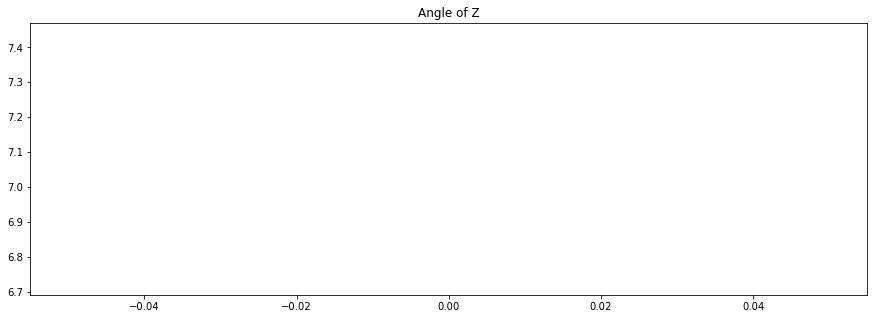

In [74]:
#[2400:3200]

p1 = A1_shift[maxsignal_1]
p2 = A2_shift[maxsignal_2]

Z = p1 * np.conj(p2)
phase_diff = np.angle(Z)

print(p1)
print(p2)
print(phase_diff)


plt.figure(figsize=(15,5)) ; 
plt.plot(abs(Z.real)) ; 
plt.title("Abs of Z") ; 

plt.figure(figsize=(15,5)) ;
plt.plot(Z.imag) ;
plt.title("Angle of Z") ;

# Angle of Arrival


In [72]:
y = 1.99 # Wave length and 89MHz
pi = np.pi
d = 1.19 # 119cm 1.19m spacing of antenna



print(phase_diff)
x = (y * phase_diff) / (2 * pi * d)
print(x)
AoA_rad = np.arcsin(x)
print("Angle of arrival in rad: ", AoA_rad)
AoA_deg = AoA_rad * 180/pi 

print("AoA in deg: ", AoA_deg, "\n")


0.21199735527207686
0.056423067023344396
Angle of arrival in rad:  0.05645304772032122
AoA in deg:  3.234521375025039 



In [ ]:
plt.figure(figsize=(5,5));
plt.plot(np.real(a2_data[0:1000]), np.imag(a2_data[0:1000]), '.')
plt.title("A2 I vs Q")
plt.xlabel("Real Plane")
plt.ylabel("Imaginary Plane")